Javier Arturo Rozo Alzate - jarozoa@eafit.edu.co
Johan Steward Rios Naranjo - jriosna1@eafit.edu.co
Liceth Cristina Mosquera Galvis - lcmosquerg@eafit.edu.co
Juan Mauricio Cuscagua Lopez - jcuscagu@eafit.edu.co
Juan Diego Estrada Perez - jestra15@eafit.edu.co

Programa: Aprendizaje Automático Docente: Olga Lucia Quintero - oquinte1@eafit.edu.co
05 de noviembre de 2019

Basado en Hands on unsupervised learning, Ankur A. Partel  (2019)

# Clustering sobre datos con dimension temporal
## No supervisado, datos proyecto integrador 

Datos mercado.

Libreria utilizada  tslearn  https://tslearn.readthedocs.io/en/latest/index.html



In [11]:
'''Main'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip, datetime
from os import listdir, walk
from os.path import isfile, join

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import Grid

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
from keras.utils import to_categorical
from sklearn.metrics import adjusted_rand_score
import random

'''Algos'''
from kshape.core import kshape, zscore
import tslearn
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import KShape, TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
import hdbscan



# Preprocesamiento de los datos

In [12]:
text_file = open("Tickers.txt", "r")
tkrs= text_file.read().split('\n')
tkrs.remove('')



In [13]:
#lectura de los datos
#symbols = ['XLP','ACN']

symbols =tkrs

path_features = "Features.txt"
features = list(pd.read_csv(path_features, sep="\n", header=None)[0].values)
features

years = [x for x in range(2018,2019)] # Define the years you need
hist_data = imp.organizarTodo(symbols,years) # Read the symbols
hist_feature = imp.organizarTodo(features,years,True) # Read the features

In [14]:
# creates a dictionary with the ticker as key, and the variation as the data.
d = {}
for key in hist_data:
    pp = hist_data[key].loc[:,'Close'].tolist()
    l = []
    for i in pp:
        l.append(((i+1)/i)-1)
    d[key]=l
    
    
    

In [15]:
# creates a dictionary with the ticker as key, and the variation as the data.
d = {}
for key in hist_data:
    pp = hist_data[key].loc[:,'Close'].tolist()
    l = []
    for i in pp:
        l.append(((i+1)/i)-1)
    d[key]= l   
    
a = []
for key in d:
    a.append(d[key])

In [16]:

y = np.hstack(a)
index = [140958,140957,140956]
y1 = np.delete(y, index)
#y1 = np.asarray(y1)
y1 = y1.reshape(262,538)

print(y1.shape)

y1 = y1.astype('float32') 

where_are_NaNs = np.isnan(y1)
y1[where_are_NaNs] = 0

np.argwhere(np.isnan(y1))

(262, 538)


array([], shape=(0, 2), dtype=int64)

# Series de tiempo

In [18]:
X_train = to_time_series_dataset(y1)

In [19]:
# Prepare the data - Scale
X_train = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X_train)

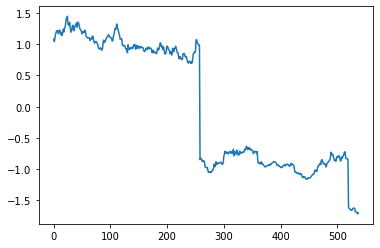

In [31]:
plt.plot(X_train[150])

In [29]:
#k-shape algo

In [30]:
ks = KShape(n_clusters=2, max_iter=100, n_init=100,verbose=0)
ks.fit(X_train)

KShape(init='random', max_iter=100, n_clusters=2, n_init=100, random_state=None,
       tol=1e-06, verbose=0)

In [32]:
preds = ks.predict(X_train)

In [33]:
print(preds)

[0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0
 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1
 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0
 1 1 1]
